### EVANDRO FONTANA ROMEIRO

Dados escolhidos:

-> IDH

-> Acesso a saneamento básico (percentual da população)

-> Urbanização (percentual da população)

<h2> INTRODUÇÃO </h2>

Esse projeto tem por objetivo o estudo das variaveis IDH, acesso da população a saneamento básico (em porcentagem da população) e urbanização (em porcentagem da população) de diversões países para descobrir como se relacionam e se possuem correlação entre si e como essa relação varia com o decorrer dos anos. Tais variaveis foram selecionadas para análise com o intuito de descobrir se o processo histórico de transição de uma sociedade predominantemente rural para uma sociedade em que a maioria das pessoas vivem nas grandes cidades e o acesso a saneamento básico, como rede de esgoto e acesso a água encanada, foram um pré-requisito para o aumento da qualidade de vida das pessoas nessa comunidade.

<h2>PERGUNTA</h2>

O acesso a saneamento básico e a urbanização são condições necessárias para o aumento da qualidade de vida em um país(IDH)?

<h3>HIPOTESES</h3>

Utilizando o senso comum e os conhecimento obtidos antes da análise realizado abaixo será feite hipoteses de como as variaveis se relacionam:

O IDH e o acesso ao saneamento básico estão fortemente relacionados;

O IDH e a Urbanização possuem fraca correlação; e

A Urbanização e a Acesso a Saneamento possuem relação moderada.


In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [59]:
#Função retirada do Notebook disponibilizado pelos professores no BlackBoard com alterações do aluno Enrico Nardi e minhas. 
def reta(dados_x, dados_y,nome_grafico, nome_x, nome_y, p_color,l_color):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c= p_color, alpha=1)
    plt.title(nome_grafico)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=l_color)
    plt.legend(['Linha de tendência da amostra'])
    

 
    #plt.tight_layout()
    plt.show()

In [60]:
dados_IDH = pd.read_excel('hdi_human_development_index.xlsx')
dados_San = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx')
dados_Urb = pd.read_excel('urban_population_percent_of_total.xlsx')

In [61]:
data_IDH = dados_IDH.set_index('geo')
data_San = dados_San.set_index('geo')
data_Urb = dados_Urb.set_index('geo')

In [62]:
data_IDH2011 = data_IDH.loc[:,[2011]]
data_San2011 = data_San.loc[:,[2011]]
data_Urb2011 = data_Urb.loc[:,[2011]]
data_IDH2011 = data_IDH2011.dropna(0);
data_San2011 = data_San2011.dropna(0);
data_Urb2011 = data_Urb2011.dropna(0);


In [63]:
df_IDH_San = data_IDH2011.join(data_San2011 , how='inner', lsuffix='_IDH', rsuffix='_San')

In [64]:
data_Urb2011 = data_Urb2011.rename(index = str, columns = {2011:'2011_Urb'})

In [65]:
df_IDH_San_Urb2011 = df_IDH_San.join(data_Urb2011, how = 'inner')

In [66]:
data_IDH2006 = data_IDH.loc[:,[2006]]
data_San2006 = data_San.loc[:,[2006]]
data_Urb2006 = data_Urb.loc[:,[2006]]
data_IDH2006 = data_IDH2006.dropna(axis=0);
data_San2006 = data_San2006.dropna(axis=0);
data_Urb2006 = data_Urb2006.dropna(axis=0);

In [67]:
df_IDH_San = data_IDH2006.join(data_San2006 , how='inner', lsuffix='_IDH', rsuffix='_San')

In [68]:
data_Urb2006 = data_Urb2006.rename(index = str, columns = {2006:'2006_Urb'})

In [69]:
df_IDH_San_Urb2006 = df_IDH_San.join(data_Urb2006, how = 'inner')

In [70]:
data_IDH2001 = data_IDH.loc[:,[2001]]
data_San2001 = data_San.loc[:,[2001]]
data_Urb2001 = data_Urb.loc[:,[2001]]
data_IDH2001 = data_IDH2001.dropna(axis=0);
data_San2001 = data_San2001.dropna(axis=0);
data_Urb2001 = data_Urb2001.dropna(axis=0);

In [71]:
df_IDH_San = data_IDH2001.join(data_San2001 , how='inner', lsuffix='_IDH', rsuffix='_San')

In [72]:
data_Urb2001 = data_Urb2001.rename(index = str, columns = {2001:'2001_Urb'})

In [73]:
df_IDH_San_Urb2001 = df_IDH_San.join(data_Urb2001, how = 'inner')

In [89]:
print("             TABELA 1")
df_IDH_San_Urb2011.corr()

             TABELA 1


2011_IDH  2011_San  2011_Urb
2011_IDH  1.000000  0.896673  0.690894
2011_San  0.896673  1.000000  0.598025
2011_Urb  0.690894  0.598025  1.000000

In [90]:
print("             TABELA 2")
df_IDH_San_Urb2006.corr()


             TABELA 2


2006_IDH  2006_San  2006_Urb
2006_IDH  1.000000  0.902078  0.716084
2006_San  0.902078  1.000000  0.631269
2006_Urb  0.716084  0.631269  1.000000

In [91]:
print("             TABELA 3")
df_IDH_San_Urb2001.corr()

             TABELA 3


2001_IDH  2001_San  2001_Urb
2001_IDH  1.000000  0.892667  0.743774
2001_San  0.892667  1.000000  0.649535
2001_Urb  0.743774  0.649535  1.000000

Coeficiente linear: -45.4893132743571
Coeficiente angular: 172.19680603325892


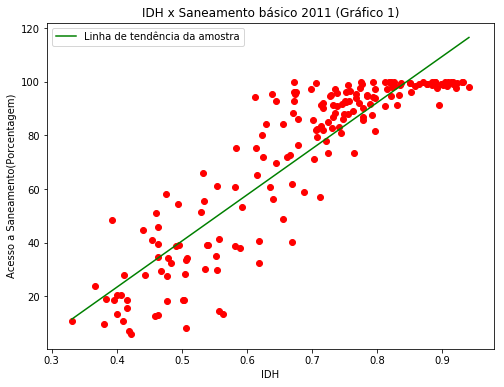

In [78]:
reta(df_IDH_San_Urb2011["2011_IDH"],df_IDH_San_Urb2011['2011_San'], "IDH x Saneamento básico 2011 (Gráfico 1)", "IDH","Acesso a Saneamento(Porcentagem)","red","green")

Coeficiente linear: -41.02248068335669
Coeficiente angular: 168.78190356197172


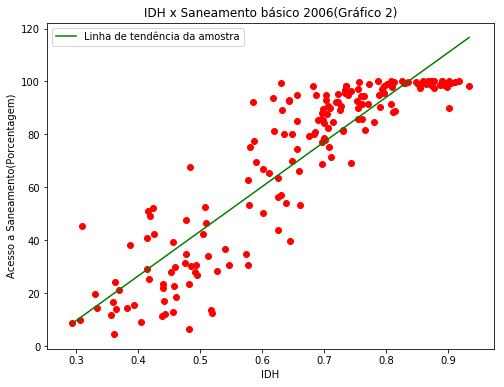

In [79]:
reta(df_IDH_San_Urb2006["2006_IDH"],df_IDH_San_Urb2006['2006_San'], "IDH x Saneamento básico 2006(Gráfico 2)", "IDH","Acesso a Saneamento(Porcentagem)","red","green")

Coeficiente linear: -37.24841075715413
Coeficiente angular: 167.33889982557167


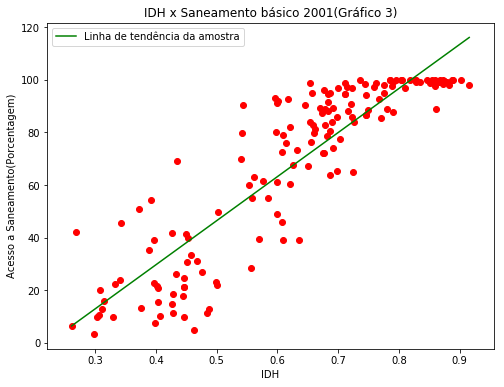

In [80]:
reta(df_IDH_San_Urb2001["2001_IDH"],df_IDH_San_Urb2001['2001_San'], "IDH x Saneamento básico 2001(Gráfico 3)", "IDH","Acesso a Saneamento(Porcentagem)","red","green")

Coeficiente linear: -15.152477454831647
Coeficiente angular: 103.09096608261953


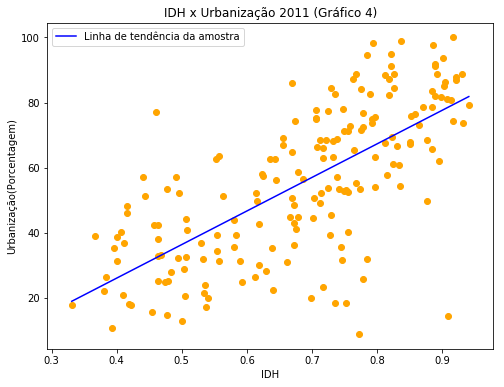

In [81]:
reta(df_IDH_San_Urb2011["2011_IDH"],df_IDH_San_Urb2011['2011_Urb'], "IDH x Urbanização 2011 (Gráfico 4)", "IDH","Urbanização(Porcentagem)","orange","blue")

Coeficiente linear: -12.141849804603346
Coeficiente angular: 100.87510339457755


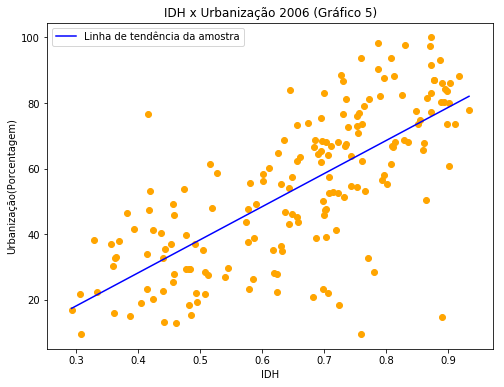

In [82]:
reta(df_IDH_San_Urb2006["2006_IDH"],df_IDH_San_Urb2006['2006_Urb'], "IDH x Urbanização 2006 (Gráfico 5)", "IDH","Urbanização(Porcentagem)","orange","blue")

Coeficiente linear: -10.638749588389928
Coeficiente angular: 101.37683004544245


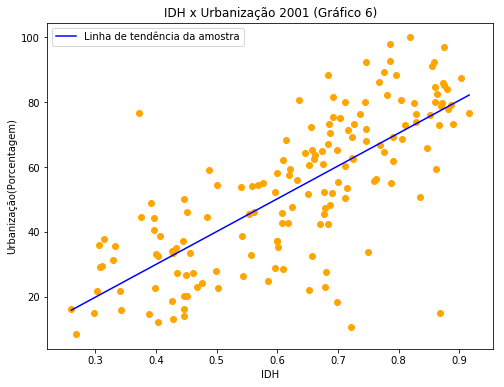

In [83]:
reta(df_IDH_San_Urb2001["2001_IDH"],df_IDH_San_Urb2001['2001_Urb'], "IDH x Urbanização 2001 (Gráfico 6)", "IDH","Urbanização(Porcentagem)","orange","blue")

Coeficiente linear: 21.75753774757053
Coeficiente angular: 0.4646625221232951


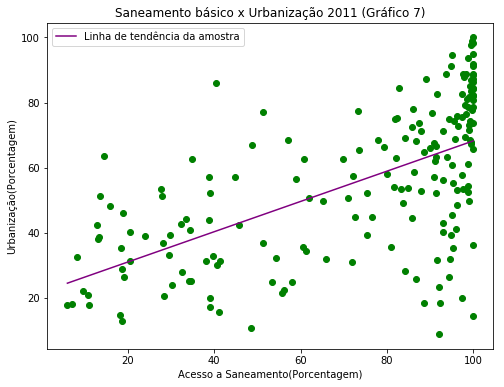

In [84]:
reta(df_IDH_San_Urb2011["2011_San"],df_IDH_San_Urb2011['2011_Urb'], "Saneamento básico x Urbanização 2011 (Gráfico 7)", "Acesso a Saneamento(Porcentagem)","Urbanização(Porcentagem)","Green","Purple")

Coeficiente linear: 20.91234759115089
Coeficiente angular: 0.4752835554742767


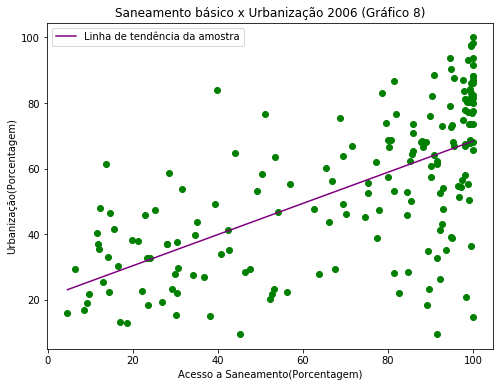

In [85]:
reta(df_IDH_San_Urb2006["2006_San"],df_IDH_San_Urb2006['2006_Urb'], "Saneamento básico x Urbanização 2006 (Gráfico 8)", "Acesso a Saneamento(Porcentagem)","Urbanização(Porcentagem)","Green","Purple")

Coeficiente linear: 21.03615350400704
Coeficiente angular: 0.4722724420458853


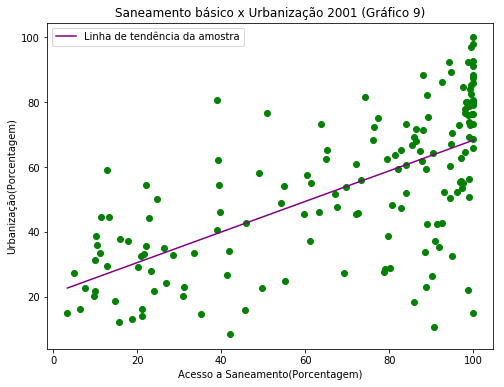

In [86]:
reta(df_IDH_San_Urb2001["2001_San"],df_IDH_San_Urb2001['2001_Urb'], "Saneamento básico x Urbanização 2001 (Gráfico 9)", "Acesso a Saneamento(Porcentagem)","Urbanização(Porcentagem)","Green","Purple")

<h2> ANÁLISES E CONCLUSÃO</h2>

Com o intuito de análisar como as variavéis IDH, Acesso a Saneamento Básico e Urbanização se correlacionam entre si e como essa correlação varia ao decorrer dos anos, foram concatenadas em um dataframe as informações das três variaveis para um mesmo ano, dando um total de três dataframes que contem as informações dos anos de 2011, 2006 e 2001.
Com esses dataframes foi possível plotar gráficos "Scatter plot" das variavéis dois a dois em cada ano, traçar uma reta de tangência sobre os gráficos e encontrar o coefiente de correlação de Pearson entre cada uma das váriaveis em um mesmo ano.
Com uma análise desses gráficos de disperção, juntamente com os coefientes de correlação, foi possível identificar o comportamento das variavéis em relação as demais.  

Nos gráficos 1,2 e 3 de 2011,2006 e 2001 respectivamente, vemos uma correlação clara e muito forte entre o Acesso ao saneamento básico e o IDH de um país. Essa conclusão é amparada pelos coefientes de Pearson bastante próximos de 1 que podemos ver nas tabelas 1,2 e 3: 0.896673 , 0.902078 e 0.892667 para os anos de 2011, 2006 e 2001 respectivamente. Esse dados indicam uma resposta afirmativa para a primeira parte do questionamento inicial e confirmando a hipótese firmada no inicio do estudo. O Saneamento básico provavelmente é um fator determinante para que um país tenha uma qualidade de vida (IDH) alto.

Pode-se ver que tal relação tem se mantido constante entre os anos estudados, reforçando mais a afirmativa.

Já nos gráficos 4,5 e 6 com dados dos anos de 2011, 2006 e 2001, que contêm a comportamento entre o IDH e a Urbanização, vemos alguns pontos mais distantes da reta de tendência que podem nos levar a pensar em alguma conclusão negativa à pergunta motivadora. Entretanto com uma observação mais profunda, percebe-se que se tratam de exceções e que a grande maioria dos países seguem a tendência da linha. Hipótese essa aparadas em coeficientes de correlação de 0.690894 para 2011, 0.716084 para 2006 e 0.743774 para 2001 indicados nas tabelas 1,2 e 3.

Também é possível observar que tal relação tem dimunuido com o decorrer dos anos, indicando que países rurais têm conseguido aumentar seu IDH sem recorrer a Urbanização, mas que apesar disso ainda há forte relação entre as variáveis. Essas conclusões também indicam uma resposta afirmativa à indagação feita no inicio do estudo e totalmente contrária a hipótese levantada.

Por fim, nos gráficos de 7,8 e 9 de 2011, 2006 e 2001, respectivamente, plotados para ver como o acesso ao saneamento básico e a urbanização se relacionam, ve-se que os pontos se encontram mais dispersos e distantes da reta de tendência se comparados aos outros gráficos analisados e com uma grande aglomeração de pontos na parte superior direita, que se deve ao fato que há uma grande quantidade de países com o grande acesso a saneamento e muito urbanizados.
Observando também os coefientes de correlação de Pearson das variaveis nas Tabelas 1,2 e 3, que são de 0.598025 em 2011, 0.631269 em 2006 e 0.649535 em 2001, pode-se perceber que há sim uma correlação de moderada para forte entre as variáveis. Essa relação deve surgir do fato de que a construção redes de esgoto e de água encanada nas grandes cidades atendem a um número maior de pessoas ao mesmo tempo, mas que essa correlação vem diminuido com o tempo, visto que com as novas tecnologias, mais pessoas foras dos grandes centros tem conseguido ter acesso a infraestrutura de saneamento.
Tal análise vai ao encontro a hipótese firmada no inicio projeto.